Dataset Created Successfully!
   Age  Income  Loan_Amount  Credit_Score  Employment_Years  \
0   59   77761        44825           542                12   
1   49  141178        21082           331                19   
2   35   56368         5661           690                21   
3   28   26783        42412           576                 6   
4   41  131530         7920           831                14   

   Previous_Defaults    Risk  
0                  0    High  
1                  1    High  
2                  2  Medium  
3                  3    High  
4                  0     Low  

Dataset Shape: (1000, 7)


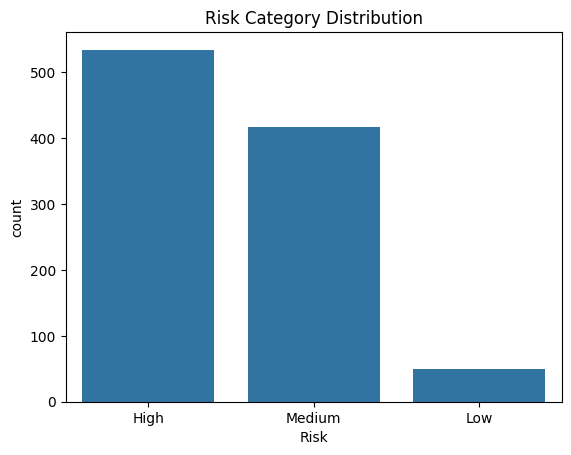

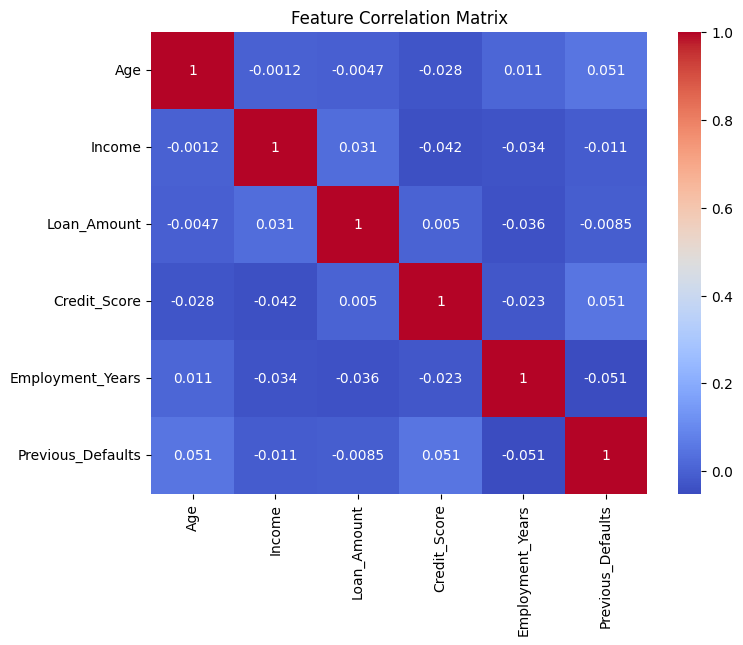


Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
Gradient Boosting Accuracy: 1.0

Cross Validation Scores:
DT CV: 1.0
RF CV: 0.999
GB CV: 1.0


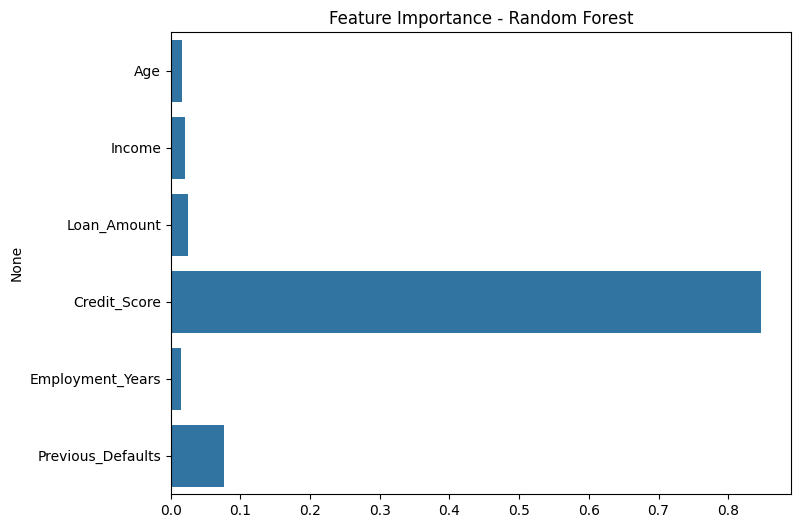

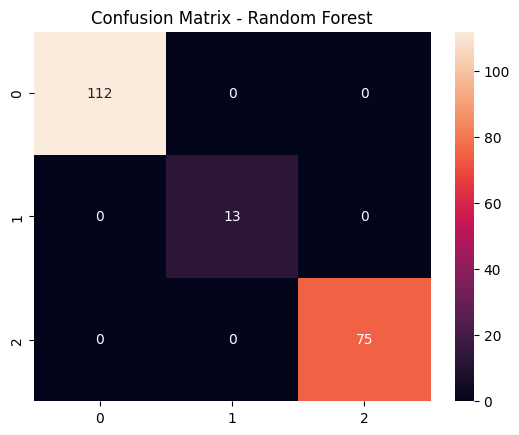


Final Pipeline Built Successfully!

PROJECT COMPLETED SUCCESSFULLY


In [3]:

!pip install xgboost -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline


np.random.seed(42)
n = 1000

df = pd.DataFrame({
    "Age": np.random.randint(21, 60, n),
    "Income": np.random.randint(20000, 150000, n),
    "Loan_Amount": np.random.randint(5000, 50000, n),
    "Credit_Score": np.random.randint(300, 850, n),
    "Employment_Years": np.random.randint(0, 30, n),
    "Previous_Defaults": np.random.randint(0, 5, n)
})

risk = []

for i in range(len(df)):
    if df.loc[i, "Credit_Score"] > 700 and df.loc[i, "Previous_Defaults"] == 0:
        risk.append("Low")
    elif df.loc[i, "Credit_Score"] > 600:
        risk.append("Medium")
    else:
        risk.append("High")

df["Risk"] = risk

print("Dataset Created Successfully!")
print(df.head())


print("\nDataset Shape:", df.shape)

plt.figure()
sns.countplot(x="Risk", data=df)
plt.title("Risk Category Distribution")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


le = LabelEncoder()
df["Risk"] = le.fit_transform(df["Risk"])

X = df.drop("Risk", axis=1)
y = df["Risk"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("\nDecision Tree Accuracy:", accuracy_score(y_test, dt_pred))


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))


print("\nCross Validation Scores:")
print("DT CV:", cross_val_score(dt, X, y, cv=5).mean())
print("RF CV:", cross_val_score(rf, X, y, cv=5).mean())
print("GB CV:", cross_val_score(gb, X, y, cv=5).mean())


importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.show()


cm = confusion_matrix(y_test, rf_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier())
])

pipeline.fit(X_train, y_train)

print("\nFinal Pipeline Built Successfully!")
print("\nPROJECT COMPLETED SUCCESSFULLY")